## Model Complexity, overfitting, Bias-Variance tradeoff

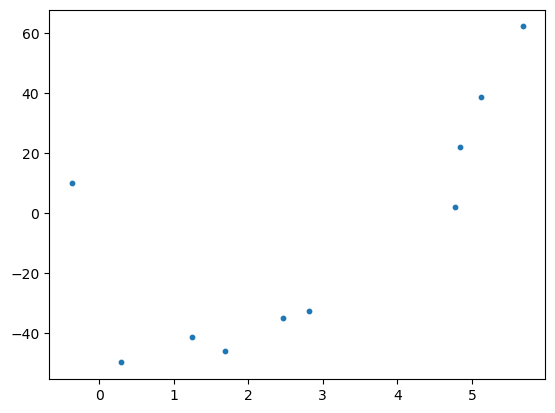

In [1]:
### Example data

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

NUMS = 10

np.random.seed(41)
x = 2 - 3 * np.random.normal(0, 1, NUMS)
y = 4 * x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-25, 25, NUMS) # add random noise

indSort = np.argsort(x)
x = x[indSort]
y = y[indSort]

plt.scatter(x, y, s=10)
plt.show()

[ 12.95867775 -44.0117175 ]


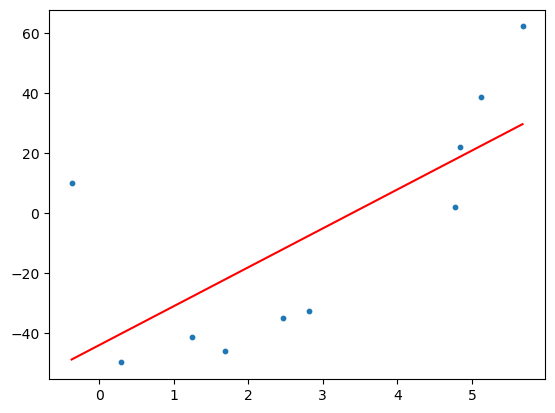

In [2]:
## Linear regression

mdlfit = np.polyfit(x, y, 1) # train: poly fit to just one degree
y_pred = mdlfit[0] * x + mdlfit[1] # predict

print(mdlfit)

plt.scatter(x, y, s=10) # plot - it doesn't fit well. the underlying data is a polynominal function, but we haven't fit it polynominally. We fit it linearly.
plt.plot(x, y_pred, color='r')
plt.show()

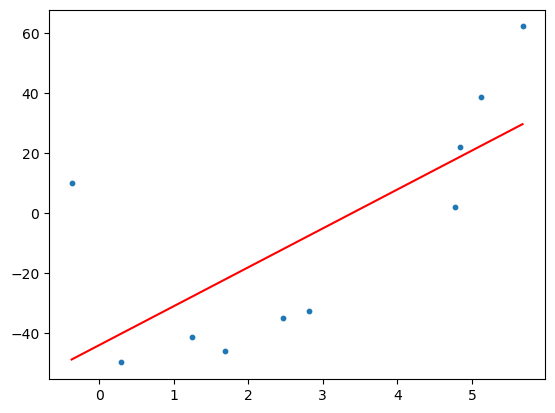

In [3]:
## Linear regression

xx = x.copy()[:, np.newaxis]
yy = y.copy()[:, np.newaxis]

model = LinearRegression() # regular linear regression
model.fit(xx, yy) # train
y_pred = model.predict(xx) # predict

plt.scatter(xx, yy, s=10) # same results as before
plt.plot(xx, y_pred, color='r')
plt.show()


In [4]:
## Calculate fitting error (root mean squared error)
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('RMSE:' + str(rmse))

RMSE:26.531717452812266


[  7.53817057 -28.82724434 -17.65909648]


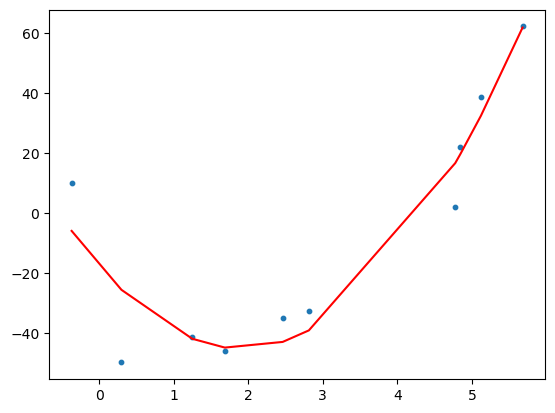

In [5]:
## More complex models (polynomial fits)

mdlfit2 = np.polyfit(x, y, 2)
y_pred2 = mdlfit2[0] * x * x + mdlfit2[1] * x + mdlfit2[2] # a polynominal fit
#y_pred2 = np.polyval(mdlfit2, x)

print(mdlfit2)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred2, color='r')
plt.show()


In [6]:
## Calculate fitting error (root mean squared error)
rmse = np.sqrt(mean_squared_error(y, y_pred2))
print('RMSE:' + str(rmse))

RMSE:10.95677677071899


[ -0.59976263  12.09859414 -36.29955224 -17.54987923]


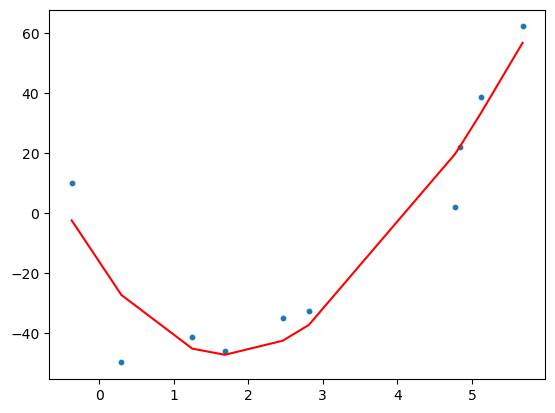

In [7]:
## More complex models (polynomial fits)

mdlfit3 = np.polyfit(x, y, 3)
y_pred3 = np.polyval(mdlfit3, x)

print(mdlfit3)

plt.scatter(x, y, s=10) # wow, fits even better. amazing.
plt.plot(x, y_pred3, color='r')
plt.show()


In [8]:
## Calculate fitting error (root mean squared error)
rmse = np.sqrt(mean_squared_error(y, y_pred3))
print('RMSE:' + str(rmse))

RMSE:10.588384805453957


[ 5.66744098e-02 -1.01571454e+00  5.44274354e+00  5.28171772e+00
 -1.65967749e+02  6.92265259e+02 -1.28645654e+03  1.03520525e+03
 -1.01276013e+02 -2.46734953e+02  1.40474040e+01]


c:\Users\radams\miniconda\envs\musa-650\lib\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


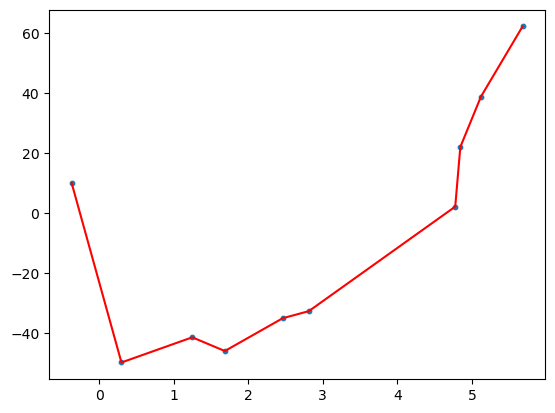

In [11]:
## More complex models (polynomial fits)
mdlfit8 = np.polyfit(x, y, 10) # 10-degrees polynominal: perfectly fits data, but is overfit
y_pred8 = np.polyval(mdlfit8, x)

print(mdlfit8)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred8, color='r')
plt.show()


In [10]:
## Calculate fitting error (root mean squared error)
rmse = np.sqrt(mean_squared_error(y, y_pred8))
print('RMSE:' + str(rmse))

RMSE:2.8870052818091385
